# Rotten Tomatoes movie review - Weekly Project

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews

The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis

This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: 
- negative
- somewhat negative
- neutral
- somewhat positive
- positive. 

Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [34]:
from sklearn.model_selection import train_test_split

# New Section

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!pwd

/content


In [37]:
import pandas as pd

In [38]:
from pathlib import Path

PATH = Path('/content/drive/My Drive/FTMLE | 2020.07 | Kuril/Week 5/rotten_tomatoes')

In [39]:
df_train = pd.read_csv(PATH/'train.csv')
sentiment = pd.read_csv(PATH/'train.csv')
df_test = pd.read_csv(PATH/'test.csv')

In [40]:
df_test.head()

,PhraseId,Phrase
0,0,drag on
1,1,your average formulaic romantic quadrangle
2,2,another retelling
3,3,pinks
4,4,imaginative


In [41]:
df_train.shape

(117045, 5)

In [42]:
# Series 
# df_train['Phrase'].index
# df_train[['PhraseId']].values

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = df_train['Phrase'].values
tfidf = TfidfVectorizer(norm='l1', smooth_idf=False)
# Feed the tf-idf Vectorizer with tweets using fit_transform()
tfidf_vec = tfidf.fit_transform(x)

# Formatting the number to 2 digits after the decimal point by showing on this notebook
np.set_printoptions(precision=2)
# To print array in one line
np.set_printoptions(linewidth=np.inf)
# print(tfidf.get_feature_names())
# print(tfidf_vec.toarray())

In [44]:
sentiment

,Unnamed: 0,PhraseId,SentenceId,Phrase,Sentiment
0,0,122,4,positively,3
1,1,19366,851,disguise the slack complacency of -LRB- Godard...,1
2,2,54763,2726,realizes a fullness that does not negate the s...,3
3,3,89708,4667,sealed,2
4,4,33494,1571,Go Where We Went 8 Movies Ago,3
...,...,...,...,...,...
117040,117040,109994,5826,It 's a boom-box of a movie that might have be...,2
117041,117041,85413,4417,advantages,2
117042,117042,133250,7189,a conventional way,2
117043,117043,130334,7021,"like Kubrick before him , may not touch the pl...",3


In [45]:
sentiment.Sentiment.value_counts()

2    59605
3    24778
1    20563
4     6846
0     5253
Name: Sentiment, dtype: int64

In [46]:
from collections import Counter
vocab = Counter()
for x in sentiment.Phrase:
    for word in x.split(' '):
        vocab[word] += 1

vocab.most_common(20)

[('the', 34583),
 (',', 31356),
 ('a', 25066),
 ('of', 24153),
 ('and', 23762),
 ('to', 16686),
 ('.', 13131),
 ("'s", 12630),
 ('in', 10128),
 ('is', 9934),
 ('that', 9071),
 ('it', 7719),
 ('as', 6340),
 ('with', 5711),
 ('for', 5445),
 ('its', 5243),
 ('film', 4953),
 ('an', 4457),
 ('movie', 4353),
 ('this', 3805)]

In [47]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [49]:
len(stop_words)

179

In [50]:
vocab_reduced = Counter()
# Go through all of the items of vocab using vocab.items() and pick only words that are not in 'stop_words' 
# and save them in vocab_reduced
for w, c in vocab.items():
    if not (w in stop_words):
        vocab_reduced[w]=c

vocab_reduced.most_common(20)

[(',', 31356),
 ('.', 13131),
 ("'s", 12630),
 ('film', 4953),
 ('movie', 4353),
 ('The', 3481),
 ("n't", 2935),
 ('--', 2550),
 ('one', 2526),
 ('like', 2137),
 ("'", 2124),
 ('A', 2024),
 ('story', 1824),
 ('-RRB-', 1820),
 ('-LRB-', 1556),
 ('good', 1488),
 ('characters', 1411),
 ('...', 1379),
 ('`', 1370),
 ("''", 1360)]

In [51]:
import re 

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # Also Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
# print(preprocessor('I like it :), |||<><>'))

In [52]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

In [53]:
def tokenizer(text):
    return text.split()

    # Split a text into list of words and apply stemming technic
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love. He loves it too'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love. He loves it too'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love.', 'He', 'loves', 'it', 'too']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love.', 'He', 'love', 'it', 'too']


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X= df_train['Phrase']
y = df_train['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)
tfidf = TfidfVectorizer(stop_words=stop_words,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0,C=0.5))])

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f87ec641048>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f87ed7c3ae8>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=0.5, class_weight=None, dual=False,
         

In [ ]:

clf.predict_proba(X_test)

array([[0.01, 0.02, 0.12, 0.58, 0.27],
       [0.01, 0.1 , 0.57, 0.25, 0.06],
       [0.01, 0.05, 0.89, 0.05, 0.01],
       ...,
       [0.02, 0.1 , 0.82, 0.05, 0.01],
       [0.12, 0.18, 0.47, 0.18, 0.05],
       [0.12, 0.4 , 0.29, 0.13, 0.07]])

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.6142082105173224
confusion matrix:
 [[  115   454   399    40     1]
 [   70  1214  2595   203     4]
 [   19   544 10672   714    16]
 [    3   107  2620  2140   112]
 [    1    17   336   776   237]]
classification report:
               precision    recall  f1-score   support

           0       0.55      0.11      0.19      1009
           1       0.52      0.30      0.38      4086
           2       0.64      0.89      0.75     11965
           3       0.55      0.43      0.48      4982
           4       0.64      0.17      0.27      1367

    accuracy                           0.61     23409
   macro avg       0.58      0.38      0.41     23409
weighted avg       0.60      0.61      0.57     23409



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.6261267034046735
confusion matrix:
 [[  193   466   303    45     2]
 [  140  1428  2292   215    11]
 [   37   670 10388   841    29]
 [    7   129  2333  2342   171]
 [    1    20   263   777   306]]
classification report:
               precision    recall  f1-score   support

           0       0.51      0.19      0.28      1009
           1       0.53      0.35      0.42      4086
           2       0.67      0.87      0.75     11965
           3       0.55      0.47      0.51      4982
           4       0.59      0.22      0.32      1367

    accuracy                           0.63     23409
   macro avg       0.57      0.42      0.46     23409
weighted avg       0.61      0.63      0.60     23409



Text(0.5, 15.0, 'Predicted label')

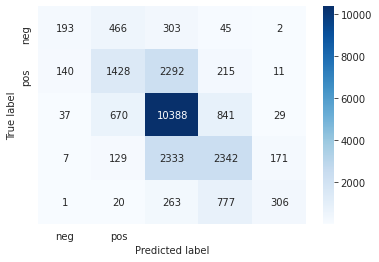

In [ ]:
cm = confusion_matrix(y_test, predictions)
# view with a heatmap
sns.heatmap(cm, annot=True,fmt='g', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
df_test_x = df_test['Phrase']
preds = clf.predict_proba(df_test_x)

In [ ]:
for i in range(len(df_test_x)):
    print(f'{df_test_x[i]} --> Negative, Positive = {preds[i]}')

Streaming output truncated to the last 5000 lines.
Attal 's hang-ups surrounding infidelity are so old-fashioned and , dare I say , outdated , it 's a wonder that he could n't have brought something fresher to the proceedings simply by accident . --> Negative, Positive = [0.06 0.6  0.15 0.16 0.03]
One senses --> Negative, Positive = [0.06 0.21 0.53 0.17 0.02]
a flawed human --> Negative, Positive = [0.01 0.19 0.62 0.17 0.01]
beguiling evocation --> Negative, Positive = [0.02 0.05 0.19 0.61 0.13]
of the year with its exquisite acting , inventive screenplay , mesmerizing music , and many inimitable scenes --> Negative, Positive = [0.01 0.01 0.02 0.12 0.84]
moving documentary --> Negative, Positive = [0.   0.02 0.24 0.33 0.4 ]
's a road-trip drama with too many wrong turns . --> Negative, Positive = [0.02 0.32 0.38 0.24 0.03]
is a blast of adrenalin --> Negative, Positive = [0.03 0.08 0.38 0.47 0.04]
Passion , melodrama , sorrow , laugther , and tears cascade over the screen effortlessly 

In [ ]:
import pickle
import os

pickle.dump(clf, open('logisticRegression.pkl', 'wb'))

In [ ]:
with open('logisticRegression.pkl', 'rb') as model:
    reload_model = pickle.load(model)
preds = reload_model.predict_proba(df_test_x)

for i in range(len(df_test_x)):
    print(f'{df_test_x[i]} --> Negative, Positive = {preds[i]}')

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Streaming output truncated to the last 5000 lines.
Attal 's hang-ups surrounding infidelity are so old-fashioned and , dare I say , outdated , it 's a wonder that he could n't have brought something fresher to the proceedings simply by accident . --> Negative, Positive = [0.06 0.6  0.15 0.16 0.03]
One senses --> Negative, Positive = [0.06 0.21 0.53 0.17 0.02]
a flawed human --> Negative, Positive = [0.01 0.19 0.62 0.17 0.01]
beguiling evocation --> Negative, Positive = [0.02 0.05 0.19 0.61 0.13]
of the year with its exquisite acting , inventive screenplay , mesmerizing music , and many inimitable scenes --> Negative, Positive = [0.01 0.01 0.02 0.12 0.84]
moving documentary --> Negative, Positive = [0.   0.02 0.24 0.33 0.4 ]
's a road-trip drama with too many wrong turns . --> Negative, Positive = [0.02 0.32 0.38 0.24 0.03]
is a blast of adrenalin --> Negative, Positive = [0.03 0.08 0.38 0.47 0.04]
Passion , melodrama , sorrow , laugther , and tears cascade over the screen effortlessly 

In [ ]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
stop_words[-10:]

['shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]